In [1]:
import os.path as osp
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
sys.path.insert(0, "../src/")


In [2]:
# Plot params
mpl.style.use("seaborn-dark")
mpl.rcParams['axes.grid'] = True
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['figure.dpi'] = 85
mpl.rcParams['axes.labelsize'] = 'large'

# This is the largest possible value of the logloss
logloss_inf_limit = -np.log(np.finfo('float').eps) 


In [3]:
def plot_task_results(df: pd.DataFrame, properties_in: list, ax=None):
    if ax is None:
        fig, ax = plt.subplots(1, 1)

    num_features = df['num_features'].iloc[0]
    ymin,ymax = np.inf,-np.inf
    
    for l in properties_in:
        attr,label = l['column_name'], l['label']
        if attr in df:
            ax.plot(df['trainset_size'], df[attr], label=label)
            ymin,ymax = min(ymin, df[attr].min()),max(ymax, df[attr].max())

    ax.axvline(x=num_features, color='r', label='Num Features', linewidth=1.0, linestyle='--')
    ax.set_yscale('log')
    ax.set_xscale('log')

    #     # student t test 
    #     lower, upper = st.t.interval(0.95, results_df[attr + '_mn'], loc=dataset_df[attr + '_mn'],
    #                                  scale=dataset_df[attr + '_mn_sem'])
    #     ax.fill_between(results_df['trainset_size'], lower, upper, color='C0', alpha=.1)
    #     lower, upper = st.t.interval(0.95, results_df[attr + '_mdl'], loc=dataset_df[attr + '_mdl'],
    #                                  scale=dataset_df[attr + '_mdl_sem'])
    #     ax.fill_between(results_df['trainset_size'], lower, upper, color='C1', alpha=.08)
    ax.set_ylim(ymin, ymax)
    return ax


In [4]:
# adaptive var
res_path = osp.join('..', 'output', 'real_data_20200710_092135', 'results.csv')

# constant var
res_path = osp.join('..', 'output', 'real_data_20200710_154715', 'results.csv')
# real_data_20200710_171528 # todo: this one is the latest, figure out  is_adaptive_var flag
# this one is the 2st.

res_df = pd.read_csv(res_path)
dataset_names = res_df['dataset_name'].unique()
print(dataset_names)

res_df = res_df.sort_values(by=['num_features', 'trainset_size', 'dataset_name'], ascending=[False, True, True])



properties = [{'column_name': 'mn_mean', 'label': 'Minimum Norm'},
             {'column_name': 'pnml_mean', 'label': 'pNML'},
             {'column_name': 'pnml_isit_mean', 'label': 'pNML ISIT'},
              {'column_name': 'genie_mean', 'label': 'Genie'},
             {'column_name': 'mdl_mean', 'label': 'MDL'}]

# MSE properties
mse_properties = copy.deepcopy(properties)
for l in mse_properties:
    l['column_name'] = 'test_mse_' + l['column_name']
print()
print('mse_properties:')
[print(l) for l in mse_properties];


# Logloss properties

logloss_properties = copy.deepcopy(properties)
for l in logloss_properties:
    l['column_name'] = 'test_logloss_' + l['column_name']
print()
print('logloss_properties:')
[print(l) for l in logloss_properties];

res_df.head()

['505_tecator' '4544_GeographicalOriginalofMusic' '588_fri_c4_1000_100'
 '583_fri_c1_1000_50' '590_fri_c0_1000_50' '603_fri_c0_250_50'
 '607_fri_c4_1000_50' '616_fri_c4_500_50' '618_fri_c3_1000_50'
 '622_fri_c2_1000_50' '626_fri_c2_500_50' '637_fri_c1_500_50'
 '645_fri_c3_500_50' '648_fri_c1_250_50' '650_fri_c0_500_50' '201_pol'
 '294_satellite_image' '582_fri_c1_500_25' '584_fri_c4_500_25'
 '644_fri_c4_250_25' '651_fri_c0_100_25' '653_fri_c0_250_25'
 '658_fri_c3_250_25' '197_cpu_act' '573_cpu_act' '574_house_16H'
 '195_auto_price' '207_autoPrice' '542_pollution' '560_bodyfat']

mse_properties:
{'column_name': 'test_mse_mn_mean', 'label': 'Minimum Norm'}
{'column_name': 'test_mse_pnml_mean', 'label': 'pNML'}
{'column_name': 'test_mse_pnml_isit_mean', 'label': 'pNML ISIT'}
{'column_name': 'test_mse_genie_mean', 'label': 'Genie'}
{'column_name': 'test_mse_mdl_mean', 'label': 'MDL'}

logloss_properties:
{'column_name': 'test_logloss_mn_mean', 'label': 'Minimum Norm'}
{'column_name': 'test

,dataset_name,trainset_size,valset_size,testset_size,num_features,n_trails,time,task_index,num_tasks,test_mse_mn_mean,...,train_mse_mdl_sem,theta_norm_mdl_mean,theta_norm_mdl_std,theta_norm_mdl_sem,test_logloss_mdl_mean,test_logloss_mdl_std,test_logloss_mdl_sem,variance_mdl_mean,variance_mdl_std,variance_mdl_sem
0,505_tecator,1,48,48,125,10,44.857580,118,119,1290.584189,...,113.686546,0.059885,0.146308,0.048769,5.021400,0.317684,0.105895,14.023889,2.798642,0.932881
1,505_tecator,2,48,48,125,10,36.895691,117,119,999.982183,...,50.875196,0.027920,0.075286,0.025095,4.706464,0.305596,0.101865,15.339570,1.587206,0.529069
2,505_tecator,3,48,48,125,10,33.309258,116,119,711.320362,...,53.606269,0.005119,0.006683,0.002228,4.699737,0.308501,0.102834,13.762078,1.630057,0.543352
3,505_tecator,4,48,48,125,10,31.647146,115,119,778.026036,...,43.929193,0.126158,0.226290,0.075430,4.665441,0.163865,0.054622,13.447555,2.354251,0.784750
4,505_tecator,6,48,48,125,10,36.636199,114,119,933.334655,...,68.521169,0.131259,0.208361,0.069454,4.630030,0.151841,0.050614,13.183496,3.101925,1.033975


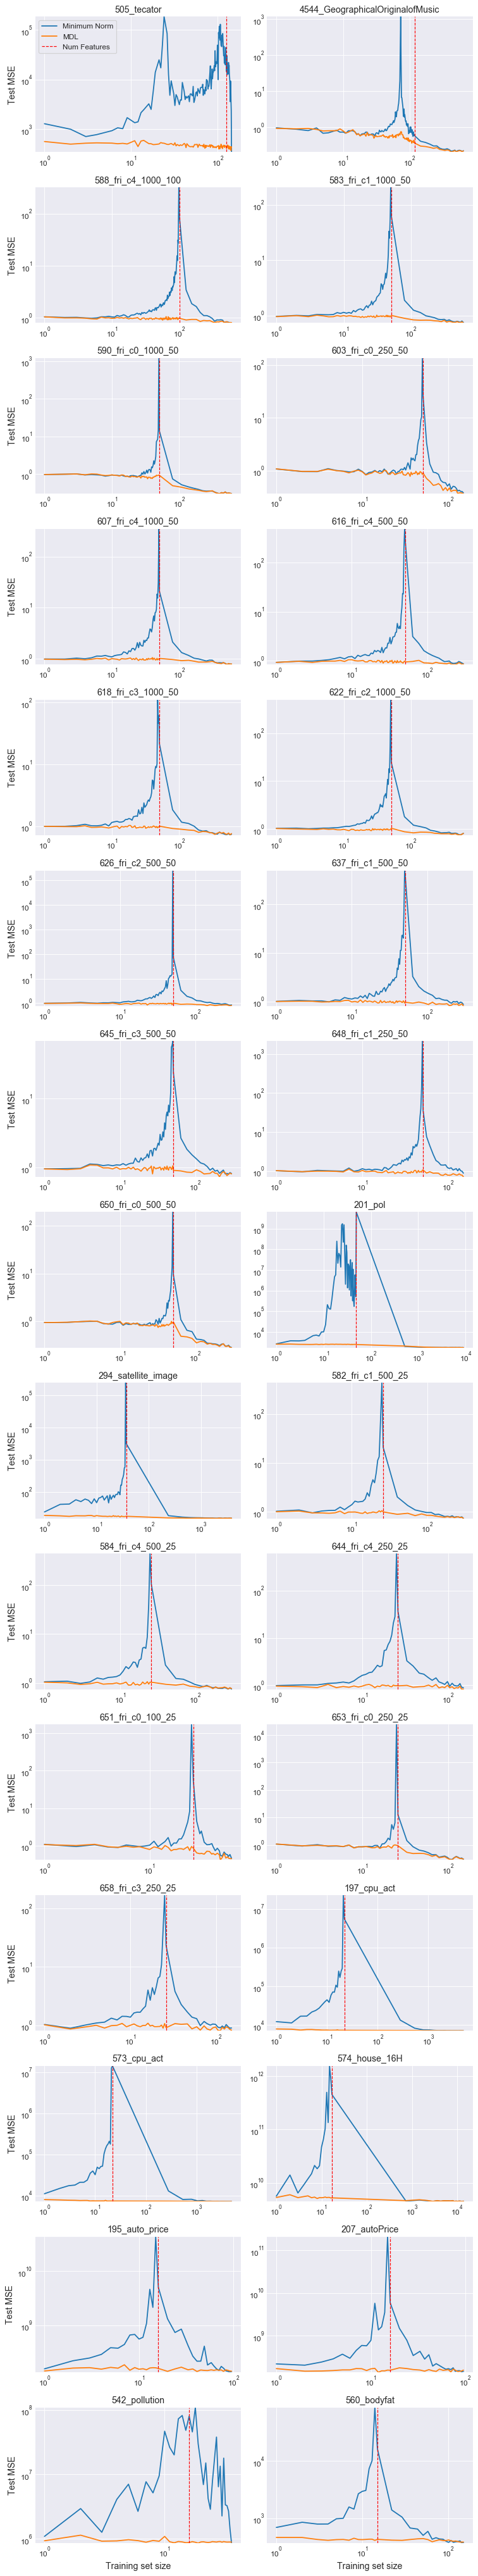

In [5]:
w, h = plt.rcParams.get('figure.figsize')
row_num = int(np.ceil(len(dataset_names) / 2))
fig, axs = plt.subplots(row_num, 2, figsize=(1.5 * w, 0.8*h * row_num))
axs_flat = axs.flatten()
for i, dataset_name in enumerate(dataset_names):
    ax = axs_flat[i]
    dataset_df = res_df[res_df['dataset_name'] == dataset_name]
    ax = plot_task_results(dataset_df,mse_properties, ax=ax)
    ax.set_title(dataset_name)

axs_flat[0].legend()
[ax.set_xlabel('Training set size') for ax in axs_flat[-2:]]  # set x axis on last 2
[ax.set_ylabel('Test MSE') for ax in axs_flat[::2]]

plt.tight_layout()
plt.show()


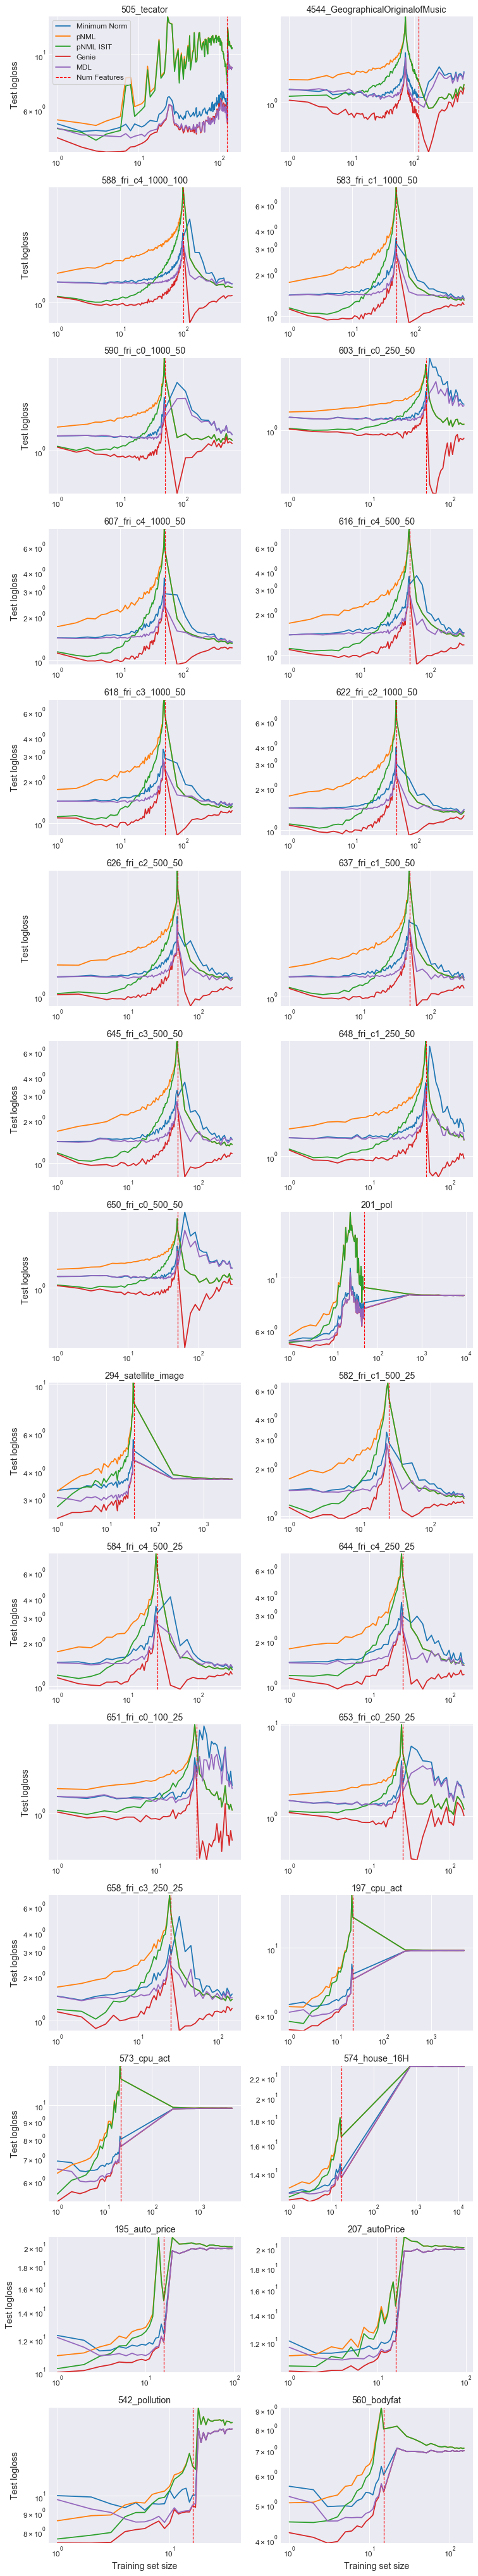

In [9]:
w, h = plt.rcParams.get('figure.figsize')
row_num = int(np.ceil(len(dataset_names) / 2))
fig, axs = plt.subplots(row_num, 2, figsize=(1.5 * w, 0.8*h * row_num))
axs_flat = axs.flatten()
for i, dataset_name in enumerate(dataset_names):
    ax = axs_flat[i]
    dataset_df = res_df[res_df['dataset_name'] == dataset_name]
    ax = plot_task_results(dataset_df, logloss_properties, ax=ax)
    ax.set_title(dataset_name)
#     ax.set_xscale('linear')
#     ax.set_yscale('linear')
    if ax.get_ylim()[-1] > 0.95* logloss_inf_limit:
        ax.set_ylim(top=0.95* logloss_inf_limit)  # set limit based on machine precision
axs_flat[0].legend()
[ax.set_xlabel('Training set size') for ax in axs_flat[-2:]]  # set x axis on last 2
[ax.set_ylabel('Test logloss') for ax in axs_flat[::2]]

plt.tight_layout()
plt.show()
